<a href="https://colab.research.google.com/github/Frostbite22/learning-DL-by-doing-1/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import torch 
from torch import nn

In [38]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [39]:
from google.colab import drive
  
drive.mount('/content/drive')
import os
os.chdir("/content/drive/MyDrive/PyTorch/learning_DL/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import zipfile 

with zipfile.ZipFile('archive.zip','r') as zip_ref:
  zip_ref.extractall()

In [41]:
path = os.getcwd()
path

'/content/drive/MyDrive/PyTorch/learning_DL'

In [42]:
import numpy as np
import pandas as pd

train_df = pd.read_csv('sign_mnist_train.csv')
test_df = pd.read_csv("sign_mnist_test.csv")


In [43]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [44]:
for index,row in train_df.iterrows():
  pixels = np.array(row[1:])
  print(pixels.reshape(28,28).shape)
  print(pixels)
  break

(28, 28)
[107 118 127 134 139 143 146 150 153 156 158 160 163 165 159 166 168 170
 170 171 171 171 172 171 171 170 170 169 111 121 129 135 141 144 148 151
 154 157 160 163 164 170 119 152 171 171 170 171 172 172 172 172 172 171
 171 170 113 123 131 137 142 145 150 152 155 158 161 163 164 172 105 142
 170 171 171 171 172 172 173 173 172 171 171 171 116 125 133 139 143 146
 151 153 156 159 162 163 167 167  95 144 171 172 172 172 172 172 173 173
 173 172 172 171 117 126 134 140 145 149 153 156 158 161 163 164 175 156
  87 154 172 173 173 173 173 173 174 174 174 173 172 172 119 128 136 142
 146 150 153 156 159 163 165 164 184 148  89 164 172 174 174 174 174 175
 175 174 175 174 173 173 122 130 138 143 147 150 154 158 162 165 166 172
 181 128  94 170 173 175 174 175 176 177 177 177 177 175 175 174 122 132
 139 145 149 152 156 160 163 165 166 181 172 103 113 175 176 178 178 179
 179 179 179 178 179 177 175 174 125 134 141 147 150 153 157 161 164 167
 168 184 179 116 126 165 176 179 180 180 1

In [45]:
# from PIL import Image
# img = Image.open('/content/drive/MyDrive/PyTorch/learning_DL/images/img16_2.png')

In [46]:
# img

In [47]:
classes = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]

In [48]:
from PIL import Image
from pathlib import Path 
from torchvision import transforms

def csv_to_image_preprocessing(global_path,image_folder,dataframe):
  #Setup path to a data folder 
  data_path = Path(global_path)
  image_path = data_path / image_folder

  #If the image folder doesn't exist, download it and prepare it 
  if image_path.is_dir():
    print(f"{image_path} directory already exists")
  else: 
    print(f"{image_path} does not exist, creating one")
    image_path.mkdir(parents=True,exist_ok=True)


  counter = dict()
  dataset = []
  is_empty = True 
  if not os.listdir(image_path):
    pass
  else:
      is_empty = False


  for index,row in dataframe.iterrows(): 
      pixels = np.array(row[1:],dtype=np.uint8)
      pixels = np.reshape(pixels,(28,28))
      image = Image.fromarray(pixels)
      label = row[0]
      
      image_transform = transforms.Compose([transforms.ToTensor()])
      dataset.append((image_transform(image),label))

      if label not in counter:
          counter[label] = 0
      counter[label] += 1
      
      if is_empty: 
        filename = 'img{}_{}.png'.format(label, counter[label])
        image.save(image_path/filename)
        print('saved:', image_path/filename)
  
  return dataset


In [49]:
train_dataset = csv_to_image_preprocessing(path,"train_images",train_df)

/content/drive/MyDrive/PyTorch/learning_DL/train_images directory already exists


In [50]:
test_dataset = csv_to_image_preprocessing(path,"test_images",test_df)

/content/drive/MyDrive/PyTorch/learning_DL/test_images directory already exists


In [51]:
image_test, label_test = test_dataset[100]

In [52]:
image_test.shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'I')

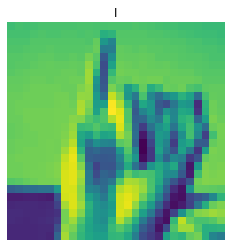

In [53]:
import matplotlib.pyplot as plt

plt.imshow(image_test.permute(1,2,0))
plt.axis(False)
plt.title(classes[label_test])


In [54]:
from torch.utils.data import DataLoader 
BATCH_SIZE = 32 
train_dataloader = DataLoader(dataset=train_dataset,
                               batch_size=BATCH_SIZE,
                               num_workers=1,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_dataset,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f3c4b2f0a30>,
 <torch.utils.data.dataloader.DataLoader at 0x7f3c4b2f0910>)

In [55]:
img, label = next(iter(train_dataloader))

print(f'Image Shape: {img.shape} -> [batch_size,color_channels,height,width]')
print(f'Label Shape: {label.shape}')

Image Shape: torch.Size([32, 1, 28, 28]) -> [batch_size,color_channels,height,width]
Label Shape: torch.Size([32])


In [56]:
import torch.nn as nn

class ResNet18(nn.Module):
    def __init__(self, input_shape : int,
                hidden_units : int,
                output_shape : int):
        super(ResNet18,self).__init__()

        self.conv1 = nn.Conv2d(input_shape, hidden_units, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(hidden_units)
        self.layer1 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, stride=1, padding=1,),
            nn.BatchNorm2d(hidden_units),        
            nn.ReLU()
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units*2, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(hidden_units*2),
            nn.ReLU(),
            nn.Conv2d(hidden_units*2, hidden_units*2, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(hidden_units*2),
            nn.ReLU()
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(hidden_units*2, hidden_units*4, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(hidden_units*4),
            nn.ReLU(),
            nn.Conv2d(hidden_units*4, hidden_units*4, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(hidden_units*4),
            nn.ReLU()
        )
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(hidden_units*4, output_shape)
        self.dropout = nn.Dropout()

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.layer1(x) 
        x = self.layer2(x) 
        x = self.dropout(x)
        x = self.layer3(x) 
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [57]:
torch.manual_seed(42)
model_1 = ResNet18(input_shape=1,
                hidden_units=16,
                output_shape=len(classes)).to(device)

model_1

ResNet18(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, k

In [58]:
import torch.nn as nn

class SimpleConv(nn.Module):
  def __init__(self,input_shape : int,
               hidden_units : int,
               output_shape):
    super(SimpleConv,self).__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(input_shape, hidden_units, kernel_size=3, stride=1, padding=1),
        nn.MaxPool2d(kernel_size=2),
        nn.ReLU(),
        nn.Dropout(0.2)
    )

    self.layer2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units*2, kernel_size=3, stride=1, padding=1),
        nn.MaxPool2d(kernel_size=2),
        nn.ReLU(),
        nn.Dropout(0.2)
    )


    self.layer3 = nn.Sequential(
        nn.Conv2d(hidden_units*2, hidden_units*4, kernel_size=3, stride=1, padding=1),
        nn.MaxPool2d(kernel_size=2),
        nn.ReLU(),
        nn.Dropout(0.2)
    )

    self.fc = nn.Linear(1152,output_shape)

  def forward(self,x):
    x = self.layer1(x)
    x = self.layer2(x)
    x = self.layer3(x)
    x = x.view(x.size(0), -1)
    x = self.fc(x)
    return x
    

In [59]:
torch.manual_seed(42)
model_2 = SimpleConv(input_shape=1,
                hidden_units=32,
                output_shape=len(classes)).to(device)

model_2

SimpleConv(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
  )
  (fc): Linear(in_features=1152, out_features=26, bias=True)
)

In [60]:
# Create train and test loops functions 
def train_step(model: torch.nn.Module,
               dataloader : torch.utils.data.DataLoader,
               loss_fn ,
               optimizer: torch.optim.Optimizer,
               device=device):
  #put the model in train mode 
  model.train()
  #setup train loss and train accuracy values 
  train_loss, train_acc = 0,0 
  #Loop through data loader data batchtes 
  for batch, (X,y) in enumerate(dataloader):
    #send data to the target device 
    X,y = X.to(device), y.to(device)
    #1.forward pass
    y_pred = model(X) #output model logits
    #2.Calculate the loss
    loss = loss_fn(y_pred,y)
    train_loss += loss.item()
    #3.Optimizer zero grad 
    optimizer.zero_grad()
    #4.loss backward
    loss.backward()
    #5. Optimizer step
    optimizer.step()

    #calculate accuracy metric 
    y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)
  
  #Adjust metrics to get average loss and accuracy per batch 
  train_loss = train_loss /len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc 


In [61]:
#Create a test step function 
def test_step(model: torch.nn.Module,
              dataloader : torch.utils.data.DataLoader,
              loss_fn ,
              optimizer: torch.optim.Optimizer,
              device=device):
  #put model in eval model 
  model.eval()
  #setup test loss and test accuracy values 
  test_loss, test_acc = 0,0
  #Turn on inference model 
  with torch.inference_mode():
    #Loop through Dataloader batches 
    for batch, (X,y) in enumerate(dataloader):
      X,y = X.to(device), y.to(device)
      #1.forward pass
      test_pred_logits = model(X)
      #2.Calculate the loss 
      loss = loss_fn(test_pred_logits,y)
      test_loss += loss.item()
      #calculate the accuracy 
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += (test_pred_labels==y).sum().item() / len(test_pred_labels)

  #Adujust metrics to get average loss and accuracy per batch 
  test_loss = test_loss / len(dataloader) 
  test_acc = test_acc / len(dataloader) 
  return test_loss , test_acc  

In [62]:
from tqdm.auto import tqdm

def train(model : torch.nn.Module,
          train_dataloader : torch.utils.data.DataLoader,
          test_dataloader : torch.utils.data.DataLoader, 
          loss_fn ,
          optimizer : torch.optim.Optimizer,
          epochs : int = 5, 
          device = device):
  #create empty results dict 
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  #loop through training and testing steps for a number of epochs 
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader= train_dataloader,
                                       loss_fn=loss_fn.to(device),
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader= test_dataloader,
                                    loss_fn=loss_fn,
                                    optimizer= optimizer, 
                                    device=device) 

    #print out 
    print(f'Epoch : {epoch} | train loss: {train_loss: .4f} | Train acc : {train_acc : .4f} | Test loss : {test_loss : .4f} | Test acc : {test_acc :.4f} ')

    #Update results dictionary 
    results['train_loss'].append(train_loss)
    results['train_acc'].append(train_acc)
    results['test_loss'].append(test_loss) 
    results['test_acc'].append(test_acc)
  
  #Return the filled results at the end of the epochs 
  return results

  

In [63]:
#Credits to 
#https://github.com/HaotianMXu/Multiclass_LinearSVM_with_SGD/blob/master/linearSVM.py

class multiClassHingeLoss(nn.Module):
    def __init__(self, p=1, margin=1, weight=None, size_average=True):
        super(multiClassHingeLoss, self).__init__()
        self.p=p
        self.margin=margin
        self.weight=weight#weight for each class, size=n_class, variable containing FloatTensor,cuda,reqiures_grad=False
        self.size_average=size_average
    def forward(self, output, y):#output: batchsize*n_class
        #print(output.requires_grad)
        #print(y.requires_grad)
        output_y=output[torch.arange(0,y.size()[0]).long().cuda(),y.data.cuda()].view(-1,1)#view for transpose
        #margin - output[y] + output[i]
        loss=output-output_y+self.margin#contains i=y
        #remove i=y items
        loss[torch.arange(0,y.size()[0]).long().cuda(),y.data.cuda()]=0
        #max(0,_)
        loss[loss<0]=0
        #^p
        if(self.p!=1):
            loss=torch.pow(loss,self.p)
        #add weight
        if(self.weight is not None):
            loss=loss*self.weight
        #sum up
        loss=torch.sum(loss)
        if(self.size_average):
            loss/=output.size()[0]#output.size()[0]
        return loss


In [64]:

#Train and evaluate model 1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set number of epochs 
NUM_EPOCHS = 8

#Recreate an instance of ResNet18
model_1  = ResNet18(input_shape=1,
                   hidden_units=24,
                   output_shape=len(classes)).to(device)

#Setup loss funcion and optimizer 
loss_fn = multiClassHingeLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01, momentum=0.9)
# Start the timer 
from timeit import default_timer as timer 
start_time = timer()

#Train model 1 
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        loss_fn=loss_fn,
                        optimizer=optimizer,
                        epochs=NUM_EPOCHS)

#End the timer and print out how long it took 
end_time = timer()
print(f'Total training time : {end_time - start_time:.3f} seconds')

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch : 0 | train loss:  2.5670 | Train acc :  0.7249 | Test loss :  0.3087 | Test acc : 0.9207 
Epoch : 1 | train loss:  0.0909 | Train acc :  0.9804 | Test loss :  0.0734 | Test acc : 0.9829 
Epoch : 2 | train loss:  0.0342 | Train acc :  0.9936 | Test loss :  0.0547 | Test acc : 0.9854 
Epoch : 3 | train loss:  0.0191 | Train acc :  0.9966 | Test loss :  0.0503 | Test acc : 0.9904 
Epoch : 4 | train loss:  0.0133 | Train acc :  0.9979 | Test loss :  0.0320 | Test acc : 0.9900 
Epoch : 5 | train loss:  0.0092 | Train acc :  0.9984 | Test loss :  0.0236 | Test acc : 0.9929 
Epoch : 6 | train loss:  0.0149 | Train acc :  0.9970 | Test loss :  0.0234 | Test acc : 0.9974 
Epoch : 7 | train loss:  0.0071 | Train acc :  0.9987 | Test loss :  0.0278 | Test acc : 0.9932 
Total training time : 64.488 seconds


In [65]:
from torch import nn
#Train and evaluate model 1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set number of epochs 
NUM_EPOCHS = 8

#Recreate an instance of ResNet18
model_1  = ResNet18(input_shape=1,
                   hidden_units=24,
                   output_shape=len(classes)).to(device)

#Setup loss funcion and optimizer 
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01, momentum=0.9)
# Start the timer 
from timeit import default_timer as timer 
start_time = timer()

#Train model 1 
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        loss_fn=loss_fn,
                        optimizer=optimizer,
                        epochs=NUM_EPOCHS)

#End the timer and print out how long it took 
end_time = timer()
print(f'Total training time : {end_time - start_time:.3f} seconds')

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch : 0 | train loss:  1.1804 | Train acc :  0.6558 | Test loss :  0.3802 | Test acc : 0.8915 
Epoch : 1 | train loss:  0.1100 | Train acc :  0.9798 | Test loss :  0.6759 | Test acc : 0.7749 
Epoch : 2 | train loss:  0.0313 | Train acc :  0.9960 | Test loss :  0.0324 | Test acc : 0.9964 
Epoch : 3 | train loss:  0.0143 | Train acc :  0.9989 | Test loss :  0.0240 | Test acc : 0.9956 
Epoch : 4 | train loss:  0.0087 | Train acc :  0.9993 | Test loss :  0.0109 | Test acc : 0.9994 
Epoch : 5 | train loss:  0.0058 | Train acc :  0.9997 | Test loss :  0.0131 | Test acc : 0.9972 
Epoch : 6 | train loss:  0.0046 | Train acc :  0.9998 | Test loss :  0.3207 | Test acc : 0.9072 
Epoch : 7 | train loss:  0.0059 | Train acc :  0.9995 | Test loss :  0.0424 | Test acc : 0.9919 
Total training time : 59.329 seconds


In [66]:
#Train and evaluate model 1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set number of epochs 
NUM_EPOCHS = 8

#Recreate an instance of SimpleConv
model_2  = SimpleConv(input_shape=1,
                   hidden_units=32,
                   output_shape=len(classes)).to(device)

#Setup loss funcion and optimizer 
loss_fn = multiClassHingeLoss()

optimizer = torch.optim.Adam(params=model_2.parameters(), lr=0.001)
# Start the timer 
from timeit import default_timer as timer 
start_time = timer()

#Train model 2
model_2_results = train(model=model_2,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        loss_fn=loss_fn,
                        optimizer=optimizer,
                        epochs=NUM_EPOCHS)

#End the timer and print out how long it took 
end_time = timer()
print(f'Total training time : {end_time - start_time:.3f} seconds')

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch : 0 | train loss:  4.6700 | Train acc :  0.5897 | Test loss :  0.6614 | Test acc : 0.8344 
Epoch : 1 | train loss:  0.3586 | Train acc :  0.8978 | Test loss :  0.3094 | Test acc : 0.9176 
Epoch : 2 | train loss:  0.1462 | Train acc :  0.9551 | Test loss :  0.2188 | Test acc : 0.9471 
Epoch : 3 | train loss:  0.0853 | Train acc :  0.9729 | Test loss :  0.1522 | Test acc : 0.9567 
Epoch : 4 | train loss:  0.0523 | Train acc :  0.9835 | Test loss :  0.1177 | Test acc : 0.9646 
Epoch : 5 | train loss:  0.0387 | Train acc :  0.9875 | Test loss :  0.1320 | Test acc : 0.9646 
Epoch : 6 | train loss:  0.0312 | Train acc :  0.9901 | Test loss :  0.1612 | Test acc : 0.9610 
Epoch : 7 | train loss:  0.0261 | Train acc :  0.9916 | Test loss :  0.1134 | Test acc : 0.9785 
Total training time : 45.279 seconds


In [67]:
from torch import nn

#Train and evaluate model 1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set number of epochs 
NUM_EPOCHS = 8

#Recreate an instance of SimpleConv
model_2  = SimpleConv(input_shape=1,
                   hidden_units=32,
                   output_shape=len(classes)).to(device)

#Setup loss funcion and optimizer 
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model_2.parameters(), lr=0.001)
# Start the timer 
from timeit import default_timer as timer 
start_time = timer()

#Train model 2
model_2_results = train(model=model_2,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        loss_fn=loss_fn,
                        optimizer=optimizer,
                        epochs=NUM_EPOCHS)

#End the timer and print out how long it took 
end_time = timer()
print(f'Total training time : {end_time - start_time:.3f} seconds')

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch : 0 | train loss:  1.0767 | Train acc :  0.6649 | Test loss :  0.2786 | Test acc : 0.9062 
Epoch : 1 | train loss:  0.1527 | Train acc :  0.9481 | Test loss :  0.1848 | Test acc : 0.9360 
Epoch : 2 | train loss:  0.0684 | Train acc :  0.9780 | Test loss :  0.1054 | Test acc : 0.9650 
Epoch : 3 | train loss:  0.0411 | Train acc :  0.9877 | Test loss :  0.1419 | Test acc : 0.9589 
Epoch : 4 | train loss:  0.0286 | Train acc :  0.9907 | Test loss :  0.1108 | Test acc : 0.9669 
Epoch : 5 | train loss:  0.0224 | Train acc :  0.9931 | Test loss :  0.0859 | Test acc : 0.9711 
Epoch : 6 | train loss:  0.0189 | Train acc :  0.9937 | Test loss :  0.1508 | Test acc : 0.9611 
Epoch : 7 | train loss:  0.0179 | Train acc :  0.9943 | Test loss :  0.1354 | Test acc : 0.9613 
Total training time : 40.896 seconds


In [68]:
image, label = test_dataset[100]

(-0.5, 27.5, 27.5, -0.5)

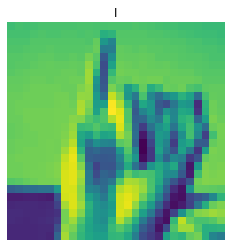

In [69]:
plt.imshow(image.permute(1,2,0))
plt.title(classes[label])
plt.axis(False)

In [70]:
logits = model_1(image.to(device).unsqueeze(0))
logits

tensor([[  7.4180,   6.0525,  -5.7115,  -1.2588,   0.4701,   7.9096,  -3.9206,
          -3.7975,  18.1753,  -4.7548,  -5.3048,   2.6355,   1.3066,   0.8414,
          -9.1870,  -2.3792,  -3.0651,  -8.0837,  -1.4583,   0.8868,  -3.1159,
           6.8984,   8.0748, -11.3860,   8.5445,  -4.1336]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [71]:
pred_prob = torch.softmax(logits,dim=1)
pred_prob

tensor([[2.1285e-05, 5.4329e-06, 4.2268e-11, 3.6289e-09, 2.0449e-08, 3.4798e-05,
         2.5338e-10, 2.8657e-10, 9.9982e-01, 1.1002e-10, 6.3477e-11, 1.7827e-07,
         4.7200e-08, 2.9641e-08, 1.3081e-12, 1.1836e-09, 5.9613e-10, 3.9423e-12,
         2.9728e-09, 3.1018e-08, 5.6656e-10, 1.2659e-05, 4.1051e-05, 1.4508e-13,
         6.5662e-05, 2.0478e-10]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [72]:
pred = torch.argmax(pred_prob,dim=1)
pred

tensor([8], device='cuda:0')

In [73]:
classes[pred]

'I'

In [74]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  preds = []
  for image in data:
    logits = model(image.to(device).unsqueeze(0))
    pred_prob = torch.softmax(logits,dim=1)
    pred = torch.argmax(pred_prob,dim=1)
    preds.append(pred)

  return preds


In [75]:
import random 

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_dataset),k=20):
  test_samples.append(sample)
  test_labels.append(label)

In [76]:
preds = make_predictions(model=model_1,
                             data=test_samples)
preds

[tensor([1], device='cuda:0'),
 tensor([20], device='cuda:0'),
 tensor([10], device='cuda:0'),
 tensor([15], device='cuda:0'),
 tensor([21], device='cuda:0'),
 tensor([15], device='cuda:0'),
 tensor([20], device='cuda:0'),
 tensor([20], device='cuda:0'),
 tensor([1], device='cuda:0'),
 tensor([4], device='cuda:0'),
 tensor([7], device='cuda:0'),
 tensor([7], device='cuda:0'),
 tensor([16], device='cuda:0'),
 tensor([8], device='cuda:0'),
 tensor([17], device='cuda:0'),
 tensor([2], device='cuda:0'),
 tensor([12], device='cuda:0'),
 tensor([6], device='cuda:0'),
 tensor([11], device='cuda:0'),
 tensor([8], device='cuda:0')]

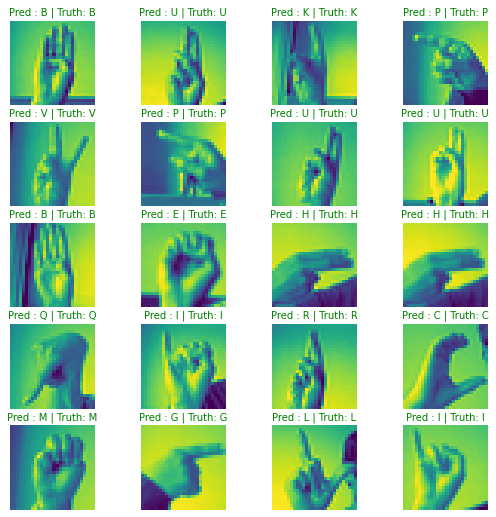

In [77]:
#Plot predictions 
plt.figure(figsize=(9,9))
nrows = 5 
ncols = 4 
for i, sample in enumerate(test_samples):
  #create subplot 
  plt.subplot(nrows,ncols,i+1)
  #plot target image 
  plt.imshow(sample.permute(1,2,0))
  #find the prediction label in text form
  pred_label = classes[preds[i]]
  # Get the truth label in text form 
  truth_label = classes[test_labels[i]]
  #Create a title for the plot 
  title_text = f"Pred : {pred_label} | Truth: {truth_label}"
  #Check for equality between pred and truth and color of title text
  if pred_label == truth_label: 
    plt.title(title_text,fontsize=10,c="g")
  else: 
    plt.title(title_text,fontsize=10,c="r")
  plt.axis(False)

In [78]:
K = 5
EPOCHS = 1
BATCH_SIZE = 256
loss_fn = multiClassHingeLoss()
test_loader = torch.utils.data.DataLoader(test_dataset, 
                                          batch_size=BATCH_SIZE)

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01, momentum=0.9)

from sklearn.model_selection import KFold
kfold = KFold(n_splits=K)

for fold_i, (train_ids, val_ids) in enumerate(kfold.split(train_dataset)):
    print(f'train size: {len(train_ids)}, val size: {len(val_ids)}')


    # Sample elements from selected ids
    train_sampler = torch.utils.data.SubsetRandomSampler(train_ids)
    val_sampler = torch.utils.data.SubsetRandomSampler(val_ids)
    # Use sampler to select data for training and validation
    train_dataloader = DataLoader(dataset=train_dataset,
                                  batch_size=BATCH_SIZE,
                                  num_workers=1,
                                  sampler=train_sampler)
    val_dataloader = DataLoader(dataset=train_dataset,
                                batch_size=BATCH_SIZE,
                                num_workers=1,
                                sampler=val_sampler)
    
    model_1_results_val = train(model=model_1,
                            train_dataloader=train_dataloader,
                            test_dataloader=val_dataloader,
                            loss_fn=loss_fn,
                            optimizer=optimizer,
                            epochs=NUM_EPOCHS)


train size: 21964, val size: 5491


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch : 0 | train loss:  0.0001 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 1 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 2 | train loss:  0.0001 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 3 | train loss:  0.0001 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 4 | train loss:  0.0001 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 5 | train loss:  0.0001 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 6 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 7 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
train size: 21964, val size: 5491


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch : 0 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 1 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 2 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 3 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 4 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 5 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 6 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 7 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
train size: 21964, val size: 5491


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch : 0 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 1 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 2 | train loss:  0.0001 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 3 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 4 | train loss:  0.0001 | Train acc :  0.9999 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 5 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 6 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 7 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
train size: 21964, val size: 5491


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch : 0 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 1 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 2 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 3 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 4 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 5 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 6 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 7 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
train size: 21964, val size: 5491


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch : 0 | train loss:  0.0001 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 1 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 2 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 3 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 4 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 5 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 6 | train loss:  0.0001 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 
Epoch : 7 | train loss:  0.0000 | Train acc :  1.0000 | Test loss :  0.0000 | Test acc : 1.0000 


In [79]:
#Saving and loading the best model 
from pathlib import Path 

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "model_hingeLoss_Resnet_SGD.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)


Saving model to: models/model_hingeLoss_Resnet_SGD.pth


In [80]:
# create a new instance
torch.manual_seed(42) 
loaded_model_1 = ResNet18(input_shape=1,
                   hidden_units=24,
                   output_shape=len(classes)).to(device)

#Load in the save state_dict()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

#Send the model to target device 
loaded_model_1.to(device)

ResNet18(
  (conv1): Conv2d(1, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (layer2): Sequential(
    (0): Conv2d(24, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (layer3): Sequential(
    (0): Conv2d(48, 96, k

In [81]:
preds2 = make_predictions(model=model_2,
                             data=test_samples)


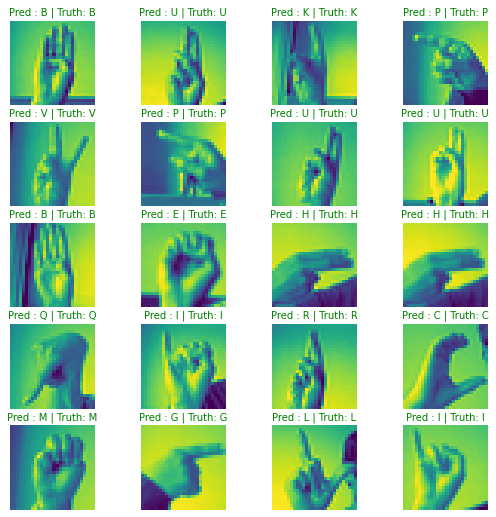

In [82]:
#Plot predictions 
plt.figure(figsize=(9,9))
nrows = 5 
ncols = 4 
for i, sample in enumerate(test_samples):
  #create subplot 
  plt.subplot(nrows,ncols,i+1)
  #plot target image 
  plt.imshow(sample.permute(1,2,0))
  #find the prediction label in text form
  pred_label = classes[preds2[i]]
  # Get the truth label in text form 
  truth_label = classes[test_labels[i]]
  #Create a title for the plot 
  title_text = f"Pred : {pred_label} | Truth: {truth_label}"
  #Check for equality between pred and truth and color of title text
  if pred_label == truth_label: 
    plt.title(title_text,fontsize=10,c="g")
  else: 
    plt.title(title_text,fontsize=10,c="r")
  plt.axis(False)

In [83]:
preds_ensemble = []
for image in test_samples:
  logits_m1 = model_1(image.to(device).unsqueeze(0))
  logits_m2 = model_2(image.to(device).unsqueeze(0))

  pred_prob_1 = torch.softmax(logits_m1,dim=1)
  pred_prob_2 = torch.softmax(logits_m2,dim=1)
  pred_prob_ensemble = pred_prob_1 + pred_prob_2
  pred_sum = torch.sum(pred_prob_ensemble,dim=0)
  pred = torch.argmax(pred_sum)
  preds_ensemble.append(pred)

preds_ensemble

[tensor(1, device='cuda:0'),
 tensor(20, device='cuda:0'),
 tensor(10, device='cuda:0'),
 tensor(15, device='cuda:0'),
 tensor(21, device='cuda:0'),
 tensor(15, device='cuda:0'),
 tensor(20, device='cuda:0'),
 tensor(20, device='cuda:0'),
 tensor(1, device='cuda:0'),
 tensor(4, device='cuda:0'),
 tensor(7, device='cuda:0'),
 tensor(7, device='cuda:0'),
 tensor(16, device='cuda:0'),
 tensor(8, device='cuda:0'),
 tensor(17, device='cuda:0'),
 tensor(2, device='cuda:0'),
 tensor(12, device='cuda:0'),
 tensor(6, device='cuda:0'),
 tensor(11, device='cuda:0'),
 tensor(8, device='cuda:0')]

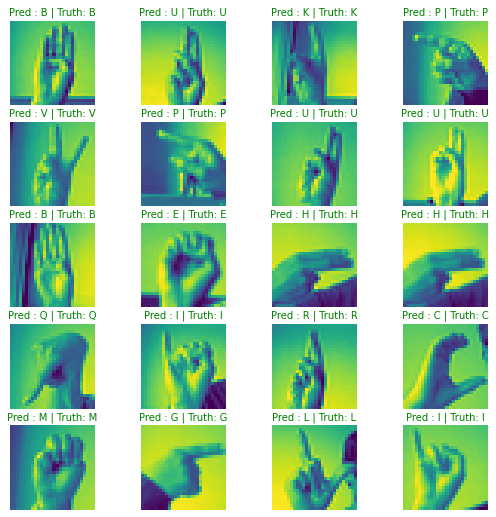

In [84]:
#Plot predictions 
plt.figure(figsize=(9,9))
nrows = 5 
ncols = 4 
for i, sample in enumerate(test_samples):
  #create subplot 
  plt.subplot(nrows,ncols,i+1)
  #plot target image 
  plt.imshow(sample.permute(1,2,0))
  #find the prediction label in text form
  pred_label = classes[preds_ensemble[i]]
  # Get the truth label in text form 
  truth_label = classes[test_labels[i]]
  #Create a title for the plot 
  title_text = f"Pred : {pred_label} | Truth: {truth_label}"
  #Check for equality between pred and truth and color of title text
  if pred_label == truth_label: 
    plt.title(title_text,fontsize=10,c="g")
  else: 
    plt.title(title_text,fontsize=10,c="r")
  plt.axis(False)